In [45]:
library("igraph")
#library("hash")
#library("e1071")
library("stringdist")

In [4]:
g <- read.graph("movie_edge_weight.txt", format="ncol", directed=FALSE)

In [63]:
#genreate name
movie_name<-file("movie_actors.txt",open="r")
r_line<-readLines(movie_name,1,encoding="latin1")
Name<-rep("",vcount(g))
while(length(r_line)!=0)
{
    rline=strsplit(r_line,"\t\t")
    nodeId<-(1:vcount(g))[V(g)$name==rline[[1]][2]]
    Name[nodeId]<-rline[[1]][1]
    r_line<-readLines(movie_name,1,encoding="latin1")
} 
close(movie_name)

In [64]:
V(g)$movie_name<-Name

In [71]:
#print(V(g)$movie_name)

In [66]:
#genreate rating
File_rate<-file("movie_rating.txt",open="r")
r_line<-readLines(File_rate,1,encoding="latin1")
nodeId1<-0
Rate<-rep("0",vcount(g))
while(length(r_line)!=0)
{
    rline=strsplit(r_line,"\t\t")
    nodeId1<-(1:vcount(g))[V(g)$movie_name==rline[[1]][1]]
    Rate[nodeId1]<-rline[[1]][2]
    r_line<-readLines(File_rate,1,encoding="latin1")
} 
close(File_rate)

In [70]:
V(g)$rate<-Rate

ERROR: Error in 1$membership: $ operator is invalid for atomic vectors


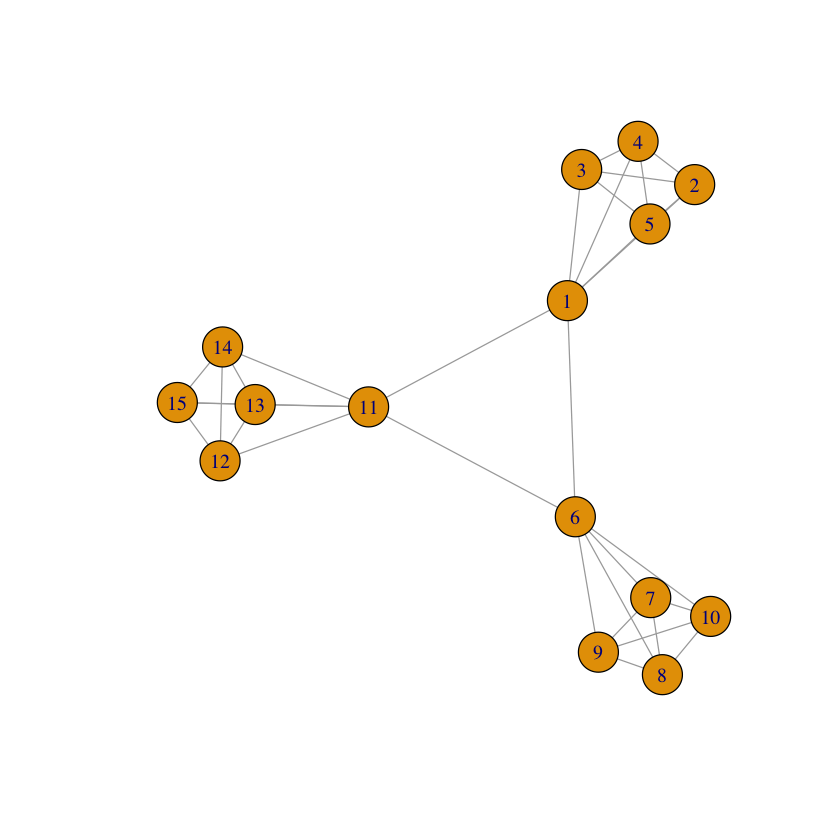

In [9]:
gt <- make_full_graph(5) %du% make_full_graph(5) %du% make_full_graph(5)
gt <- add_edges(g, c(1,6, 1,11, 6, 11))
plot(gt)
fc <- cluster_fast_greedy(gt)
fc$membership
sizes(fc)